In [1]:
from tensorflow.keras import backend as K
K.clear_session()

In [2]:
!pip install rarfile

In [3]:
import gdown
import rarfile
import os

# Correct URL after permissions are updated
url = 'https://drive.google.com/uc?id=1FAUSzwEDHfLN_McqFpQ6a3VWoc6h9qgw'
output_rar = '/content/WHEAT.rar'

# Download the RAR file
gdown.download(url, output_rar, quiet=False)

# Check if the downloaded file is valid before extracting
if os.path.exists(output_rar):
    try:
        # Try to open the downloaded file as a RAR file
        with rarfile.RarFile(output_rar, 'r') as rar_ref:
            rar_ref.extractall('/content')
        print("File extracted successfully!")
    except rarfile.NotRarFile:
        print("Error: The downloaded file is not a valid RAR archive.")
else:
    print("Error: File not found.")

Downloading...
From (original): https://drive.google.com/uc?id=1FAUSzwEDHfLN_McqFpQ6a3VWoc6h9qgw
From (redirected): https://drive.google.com/uc?id=1FAUSzwEDHfLN_McqFpQ6a3VWoc6h9qgw&confirm=t&uuid=bf868e87-8b7c-4b74-91cc-77caed74b3dc
To: /content/WHEAT.rar
100%|██████████| 228M/228M [00:04<00:00, 46.8MB/s]


File extracted successfully!


In [4]:
# Path to the extracted dataset folder

dataset = '/content/Wheat'

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional_3 (Functional) │ (None, 192)            │        172,272 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional_4 (Functional) │ (None, 128)            │         13,568 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 320)            │              0 │ functional_3[0][0],    │
│ (Concatenate)             │                        │                │ functional_4[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1024)           │        328,704 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 10)             │         10,250 │ dense_2[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 524,794 (2.00 MB)

 Trainable params: 524,154 (2.00 MB)

 Non-trainable params: 640 (2.50 KB)

Found 4204 images belonging to 3 classes.
Found 598 images belonging to 3 classes.
Found 1198 images belonging to 3 classes.
Epoch 1/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 31s 157ms/step - accuracy: 0.5465 - loss: 1.2911 - val_accuracy: 0.3344 - val_loss: 1.6759
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 27s 94ms/step - accuracy: 0.8120 - loss: 0.4769 - val_accuracy: 0.3395 - val_loss: 2.2343
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.8460 - loss: 0.4079 - val_accuracy: 0.3712 - val_loss: 2.0240
Epoch 4/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.8487 - loss: 0.3655 - val_accuracy: 0.5819 - val_loss: 1.3242
Epoch 5/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.8723 - loss: 0.3415 - val_accuracy: 0.8445 - val_loss: 0.4066
Epoch 6/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - accuracy: 0.8725 - loss: 0.3270 - val_accuracy: 0.9164 - val_loss: 0.2389
Epoch 7/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.8839 - loss: 0.2957 - val_

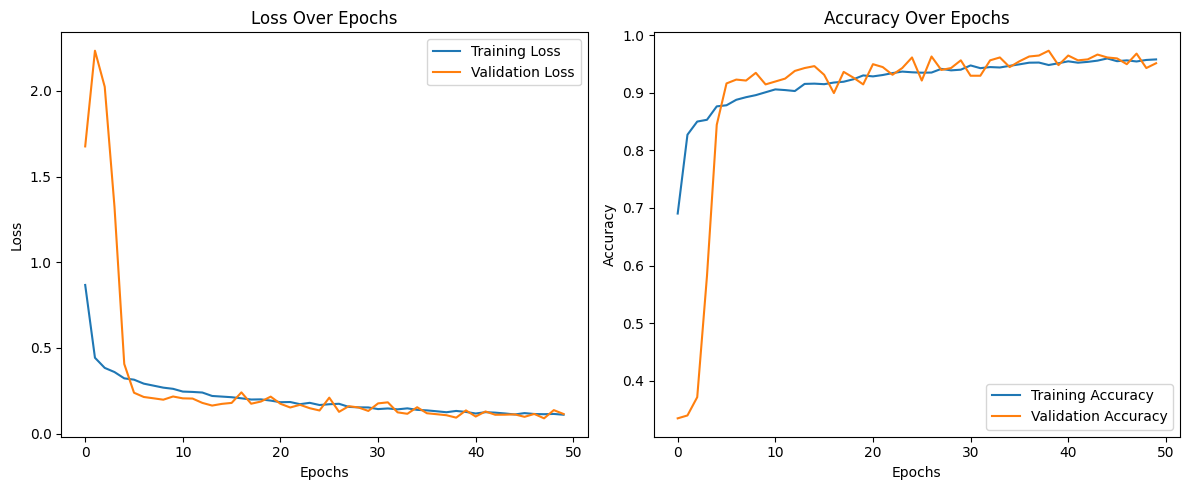

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step

Performance on Test Data
Precision: 0.9493989697322738
Recall: 0.9482470784641068
F1 Score: 0.9483763936975445
Accuracy: 0.9482470784641068
Confusion Matrix:
              Brown_Rust  Healthy  Yellow_Rust
Brown_Rust          386        1           13
Healthy              16      370           12
Yellow_Rust          16        4          380


In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Conv2D, MaxPooling2D, DepthwiseConv2D, BatchNormalization, ReLU, Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt  # For plotting
import pandas as pd  # For displaying confusion matrix

# Directory for the dataset
data_dir = dataset  # Replace with your dataset path

# Function to create InceptionV3 from scratch (only base part for feature extraction)
def inceptionv3_base(input_shape=(224, 224, 3)):
    inputs = layers.Input(shape=input_shape)

    # Initial Conv Layers (first few layers of InceptionV3)
    x = Conv2D(32, (3, 3), strides=(2, 2), padding='valid', activation='relu')(inputs)
    x = Conv2D(32, (3, 3), padding='valid', activation='relu')(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)

    # Rest of the InceptionV3 blocks (simplified)
    x = Conv2D(80, (1, 1), padding='valid', activation='relu')(x)
    x = Conv2D(192, (3, 3), padding='valid', activation='relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)

    # Add additional inception blocks or custom blocks as needed (for brevity, simplified here)
    x = GlobalAveragePooling2D()(x)  # Global Avg Pooling as a common InceptionV3 trait
    return Model(inputs, x)  # Return the feature extractor

# Function to create Custom-CNN from scratch (used for feature extraction after InceptionV3)
def custom_cnn_base(input_shape=(224, 224, 3)):
    inputs = layers.Input(shape=input_shape)

    # Block 1
    x = Conv2D(32, (3, 3), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Depthwise Separable Convolution Blocks
    # Block 2
    x = DepthwiseConv2D((3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(64, (1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Block 3
    x = DepthwiseConv2D((3, 3), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(128, (1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Global Average Pooling at the end of Custom-CNN
    x = GlobalAveragePooling2D()(x)

    return Model(inputs, x)  # Return the feature extractor

# Build the InceptionV3 feature extraction part
inception_base = inceptionv3_base(input_shape=(224, 224, 3))

# Build the Custom-CNN feature extraction part
custom_cnn_base = custom_cnn_base(input_shape=(224, 224, 3))

# Combine the features extracted from both models
inputs = layers.Input(shape=(224, 224, 3))

# Extract features from both models
inception_features = inception_base(inputs)
custom_cnn_features = custom_cnn_base(inputs)

# Concatenate the features from both models
x = Concatenate()([inception_features, custom_cnn_features])

# Fully connected layers after feature extraction
x = Dense(1024, activation='relu')(x)
outputs = Dense(3, activation='softmax')(x)  # Adjust for your number of classes

# Create the hybrid model
hybrid_model = Model(inputs, outputs)

# Print the hybrid model summary
hybrid_model.summary()

# Compile the hybrid model
hybrid_model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ImageDataGenerators for loading the dataset
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators for training, validation, and testing
train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(data_dir, 'validation'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'test'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# Training the hybrid model
history = hybrid_model.fit(train_generator, epochs=50, validation_data=val_generator)

# Plot training results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Helper function to evaluate the hybrid model on test data
def evaluate_model(test_generator, model, classes, title="Performance"):
    y_test_pred = model.predict(test_generator)
    y_test_pred = np.argmax(y_test_pred, axis=1)

    precision = precision_score(test_generator.labels, y_test_pred, average='weighted')
    recall = recall_score(test_generator.labels, y_test_pred, average='weighted')
    f1 = f1_score(test_generator.labels, y_test_pred, average='weighted')
    accuracy = accuracy_score(test_generator.labels, y_test_pred)

    print(f"\n{title}")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Accuracy:", accuracy)

    # Display the confusion matrix
    confusion = confusion_matrix(test_generator.labels, y_test_pred)
    confusion_df = pd.DataFrame(confusion, index=classes, columns=classes)
    print("Confusion Matrix:\n", confusion_df)

# Test the hybrid model on the test set
evaluate_model(test_generator, hybrid_model, ['Brown_Rust', 'Healthy', 'Yellow_Rust'], title="Performance on Test Data")
